The point of this task is to determine the optimal k and number of bootstrap iterations in KNN algorithm on the MNIST dataset. We want to optimize k in terms of accuracy on test subset and optimize number of iterations in terms of balance between convergence of the average and computation time.

In [ ]:
# Download mnist data
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

In [ ]:
# Necessary imports
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
# Data preprocessing
with np.load('mnist.npz') as data:
    SAMPLE_SIZE = 5000
    imgs = [l.flatten() for l in data['train_data'][:SAMPLE_SIZE]]
    X = [[imgs[i][j] / 255 for j in range(len(imgs[i]))] for i in range(len(imgs))]
    Y = data['train_labels'][:SAMPLE_SIZE]

For faster computations I chose the subset of MNIST consisting of 5000 elements.

In [ ]:
# Check if the chosen subset of Mnist is diverse
values = [0] * 10
for i in Y: values[i] += 1
print(values)

[479, 563, 488, 493, 535, 434, 501, 550, 462, 495]


We see that the chosen subset of MNIST has more or less equal distribiution of each digit. Is is important to check this because, for simplicity, we took deterministic subset rather than sample.

In [ ]:
# Main algorithm
avg_acc_for_k = []
avg_acc_for_k_per_iter = []

ITER_NUM = 124
TRAIN_SIZE = 3000

for k in range(1, 11):
  acc_sum = 0
  avg_acc_per_iter = []

  for i in range(ITER_NUM):
    Z = [(X[i], Y[i]) for i in range(len(X))]
    random.shuffle(Z)

    X_train = np.array([z[0] for z in Z[:TRAIN_SIZE]])
    Y_train = np.array([z[1] for z in Z[:TRAIN_SIZE]])

    X_test = np.array([z[0] for z in Z[TRAIN_SIZE:]])
    Y_test = np.array([z[1] for z in Z[TRAIN_SIZE:]])

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train.reshape(-1,28*28), Y_train)

    Y_test_pred = model.predict(X_test.reshape(-1,28*28))
    acc_sum += (Y_test_pred == Y_test).mean()

    avg_acc_per_iter.append(acc_sum / (i+1))

  avg_acc_for_k.append(acc_sum / ITER_NUM)
  avg_acc_for_k_per_iter.append(avg_acc_per_iter)

  print(f"Average accuracy for k={k}: {round(avg_acc_for_k[k-1], 4)}")

Average accuracy for k=1: 0.9316
Average accuracy for k=2: 0.9169
Average accuracy for k=3: 0.9272
Average accuracy for k=4: 0.9258
Average accuracy for k=5: 0.9258
Average accuracy for k=6: 0.9234
Average accuracy for k=7: 0.9232
Average accuracy for k=8: 0.9203
Average accuracy for k=9: 0.9175
Average accuracy for k=10: 0.918


I decided to run 124 iterations dividing the set into train set consisting of 3000 elements and test set of 2000 elements. We can see that greater k actually gives worse results, which is unexpected. I don't really see the reason for this behavior. For smaller values of iterations the same happens. It happens that k = 2 is particularly bad which is kinda expected.

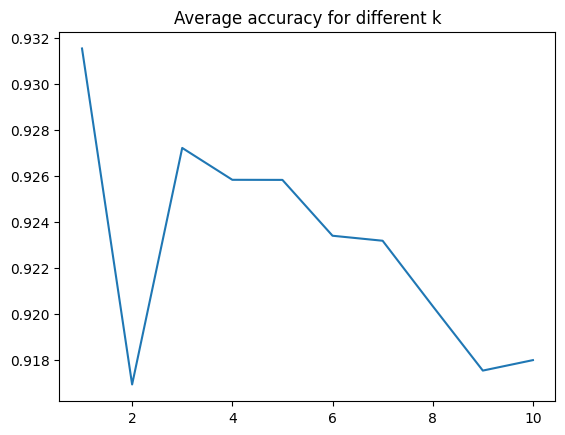

In [ ]:
# Plot of average accurancy for each k
plt.plot(range(1, 11), avg_acc_for_k)
plt.title(f"Average accuracy for different k")
plt.show()

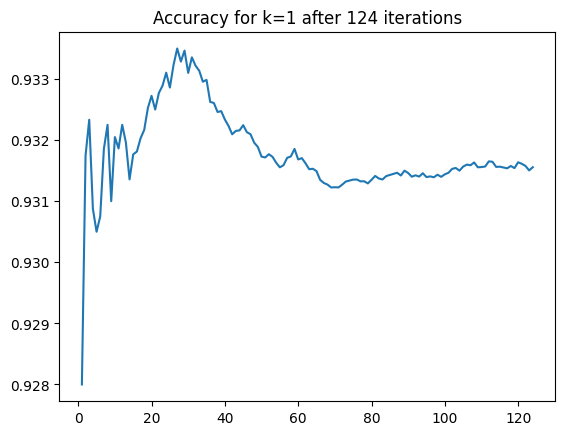

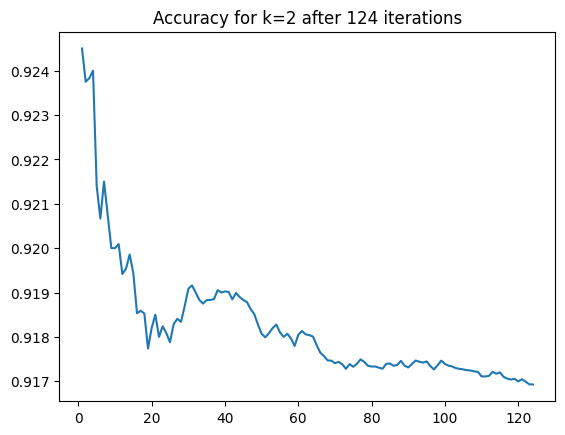

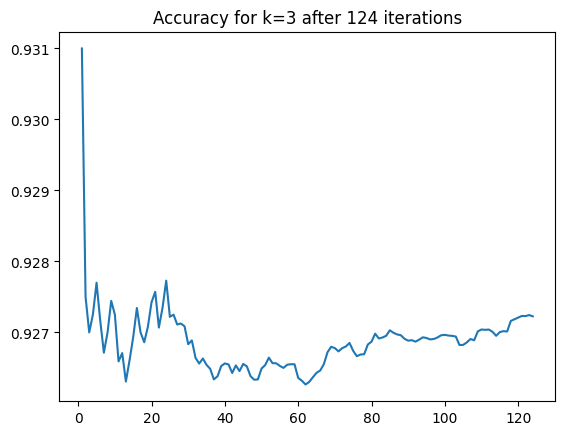

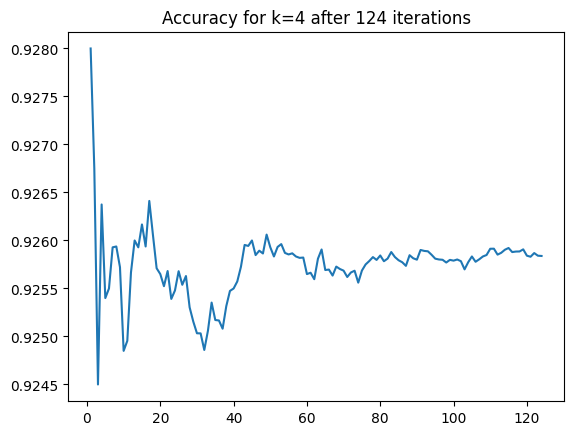

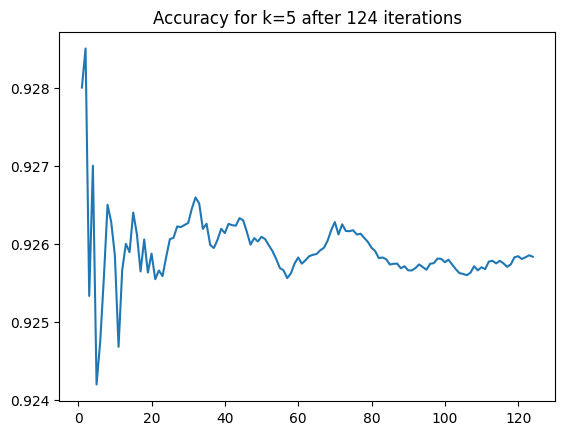

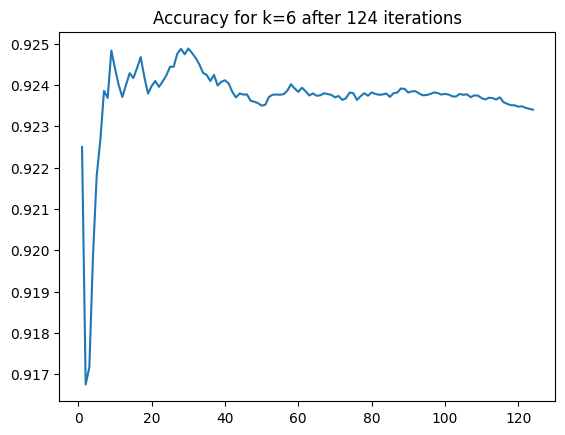

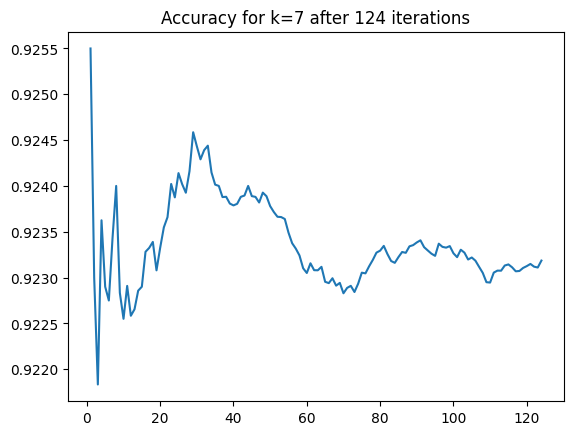

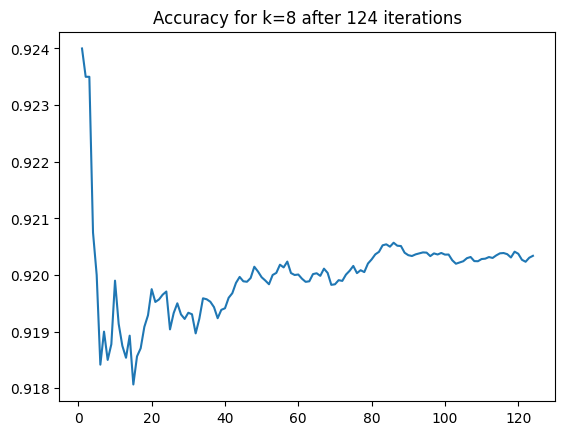

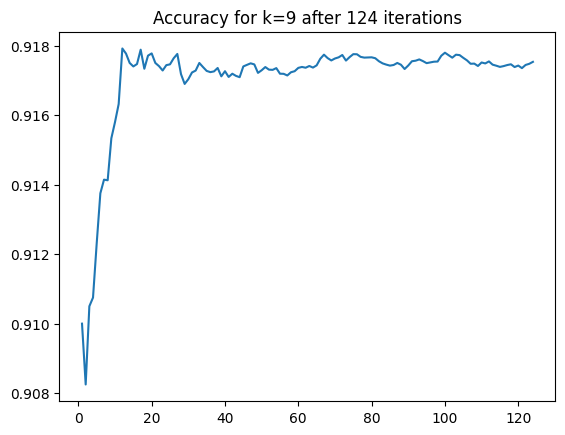

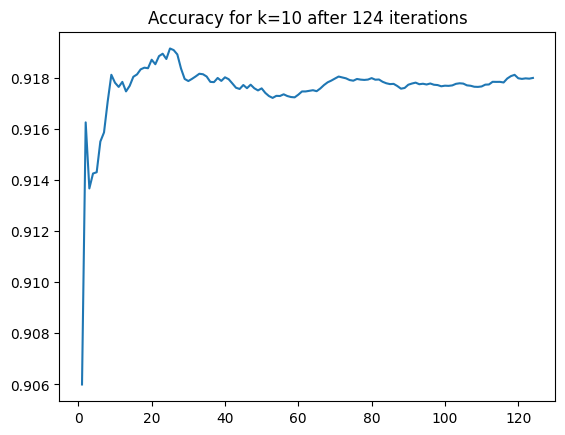

In [ ]:
# For each k plot of accuracy convergence for each k
for k in range(10):
  plt.title(f"Accuracy for k={k+1} after {ITER_NUM} iterations")
  plt.plot(range(1, ITER_NUM+1), avg_acc_for_k_per_iter[k])
  plt.show()

We can see that average converges nicely and stabilizes after ~50 iterations (3-digit precision is aquired then, please note the scaling of the Y axis).

To summarize, the optimal k for this problem is 1 and optimal number of bootstrap iterations is ~50, but for slightly larger numbers waiting time is still bearable.

author: Dominik Biernacki